<h1>Data Preprocessing 02 - Missing values and Outliers

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file = './Dataset.csv'
df = pd.read_csv(file)
df.head(8)

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,1,0,17072
1,1,1,65.0,100.0,NaN,NaN,72.0,NaN,16.5,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,2,0,17072
2,2,2,78.0,100.0,NaN,NaN,42.5,NaN,NaN,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,3,0,17072
3,3,3,73.0,100.0,NaN,NaN,NaN,NaN,17.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,4,0,17072
4,4,4,70.0,100.0,NaN,129.0,74.0,69.0,14.0,NaN,...,NaN,330.0,68.54,0,NaN,NaN,-0.02,5,0,17072
5,5,5,62.0,100.0,NaN,124.0,85.0,61.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,6,0,17072
6,6,6,61.0,100.0,NaN,101.0,75.0,58.0,14.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,7,0,17072
7,7,7,68.0,100.0,35.78,142.0,93.5,78.0,16.0,NaN,...,NaN,NaN,68.54,0,NaN,NaN,-0.02,8,0,17072


<h3>Analyzing Sepsis Patients

In [3]:
sep_pat=df[df['SepsisLabel']==1].Patient_ID.unique()
len(sep_pat)

2932

In [4]:
df_sep=df[df.Patient_ID.isin(sep_pat)]
df_sep

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
235,0,0,77.0,100.0,NaN,NaN,26.5,NaN,21.00,NaN,...,NaN,NaN,59.28,1,NaN,NaN,-0.02,3,0,11093
236,1,1,71.5,97.5,NaN,97.0,83.5,68.0,16.50,NaN,...,NaN,158.0,59.28,1,NaN,NaN,-0.02,4,0,11093
237,2,2,79.0,100.0,NaN,106.0,87.0,72.0,20.75,NaN,...,NaN,NaN,59.28,1,NaN,NaN,-0.02,5,0,11093
238,3,3,61.0,100.0,NaN,151.0,95.0,90.0,16.00,NaN,...,NaN,NaN,59.28,1,NaN,NaN,-0.02,6,0,11093
239,4,4,49.0,100.0,NaN,145.0,92.0,84.0,20.00,NaN,...,NaN,NaN,59.28,1,NaN,NaN,-0.02,7,0,11093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551371,5,5,54.5,98.5,37.2,104.5,74.0,55.0,NaN,31.5,...,NaN,NaN,66.00,1,1.0,0.0,0.00,6,1,119010
1551372,6,6,54.0,96.0,NaN,112.0,74.0,52.0,NaN,37.0,...,NaN,NaN,66.00,1,1.0,0.0,0.00,7,1,119010
1551373,7,7,67.5,96.5,NaN,118.0,77.0,55.0,NaN,38.0,...,NaN,NaN,66.00,1,1.0,0.0,0.00,8,1,119010
1551374,8,8,67.0,96.0,NaN,115.5,76.0,55.5,NaN,NaN,...,NaN,NaN,66.00,1,1.0,0.0,0.00,9,1,119010


In [5]:
#Sepsis proportion
df_sep.SepsisLabel.value_counts()

0    144494
1     27916
Name: SepsisLabel, dtype: int64

<h3>Missing Values

<h6>Missing Value Percentage

In [6]:
df_sep.isnull().mean().sort_values(ascending = False)

Bilirubin_direct    0.996984
TroponinI           0.992953
Fibrinogen          0.989734
Bilirubin_total     0.980053
Alkalinephos        0.976997
AST                 0.976973
PTT                 0.960901
SaO2                0.951001
Lactate             0.946210
Phosphate           0.945688
HCO3                0.942428
Chloride            0.936338
Platelets           0.934517
Creatinine          0.931599
WBC                 0.926193
Calcium             0.925637
Magnesium           0.919923
BUN                 0.918845
Hgb                 0.916612
BaseExcess          0.911206
PaCO2               0.908178
Hct                 0.901525
EtCO2               0.894936
pH                  0.888638
Potassium           0.884224
FiO2                0.832614
Glucose             0.821072
Temp                0.646691
Unit2               0.492721
Unit1               0.492721
DBP                 0.252607
SBP                 0.138252
Resp                0.129117
O2Sat               0.091578
MAP           

<h6>Missing Values grouping by Patients

In [7]:
total_df= df_sep.isnull().groupby(df_sep['Patient_ID']).sum()
percent_df = ((total_df)/(df_sep.isnull().groupby(df_sep['Patient_ID']).count()))*100
percent_df.head()

,Unnamed: 0,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_ID
Patient_ID,,,,,,,,,,,,,,,,,,,,,
9,0.0,0.0,7.751938,7.751938,56.589147,7.751938,7.751938,12.790698,7.751938,100.0,...,97.674419,92.635659,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0
11,0.0,0.0,2.941176,2.941176,73.529412,5.882353,5.882353,5.882353,20.588235,100.0,...,100.000000,91.176471,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0
15,0.0,0.0,13.333333,100.000000,13.333333,13.333333,13.333333,13.333333,20.000000,100.0,...,100.000000,86.666667,0.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0
18,0.0,0.0,1.492537,5.223881,38.059701,57.462687,2.238806,57.462687,1.492537,100.0,...,100.000000,95.522388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,100.0,...,100.000000,94.736842,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
'''percentage of 100% missing data for each person'''
#ex: 89% of population don't have even one value for bilirubin_direct or have 100% null values
missing_100=(percent_df==100).sum().sort_values(ascending=False)
percent_100=(missing_100/percent_df.shape[0])*100
percent_100

Bilirubin_direct    89.085948
TroponinI           82.332879
EtCO2               82.025921
Fibrinogen          80.047749
SaO2                48.772169
BaseExcess          46.725784
Bilirubin_total     44.918145
Unit1               44.884038
Unit2               44.884038
Alkalinephos        44.849932
AST                 44.508868
HCO3                40.654843
Lactate             37.960437
Chloride            35.334243
PTT                 33.901774
FiO2                25.068213
PaCO2               24.965894
pH                  24.113233
Phosphate           18.349250
DBP                 16.848568
Magnesium            9.618008
Calcium              8.969986
WBC                  8.253752
Platelets            8.253752
Hgb                  7.605730
Hct                  6.855389
Creatinine           6.753070
BUN                  6.514325
Potassium            4.911323
Glucose              4.058663
SBP                  3.785812
Temp                 1.193724
Resp                 0.477490
O2Sat     

<h3>Removing columns</h3><br>
<li><b>Dummy Column:</b> Unnamed: 0
<li><b>With more than 80% missing data:</b> Bilirubin_direct, TroponinI, EtCO2, Fibrinogen
<li><b>Relevance :</b> HospAdmTime, ICULOS, Unit1, Unit2

In [9]:
df_sep=df_sep.drop(columns=['Unnamed: 0','Bilirubin_direct', 'TroponinI', 'EtCO2', 'Fibrinogen','HospAdmTime','ICULOS',
                            'Unit1','Unit2'])

In [10]:
df_sep.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,...,Bilirubin_total,Hct,Hgb,PTT,WBC,Platelets,Age,Gender,SepsisLabel,Patient_ID
235,0,77.0,100.0,NaN,NaN,26.5,NaN,21.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,59.28,1,0,11093
236,1,71.5,97.5,NaN,97.0,83.5,68.0,16.50,NaN,22.0,...,0.9,42.2,15.6,NaN,17.7,158.0,59.28,1,0,11093
237,2,79.0,100.0,NaN,106.0,87.0,72.0,20.75,-3.0,22.0,...,NaN,42.2,15.6,NaN,17.7,NaN,59.28,1,0,11093
238,3,61.0,100.0,NaN,151.0,95.0,90.0,16.00,-3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,59.28,1,0,11093
239,4,49.0,100.0,NaN,145.0,92.0,84.0,20.00,-1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,59.28,1,0,11093


<Axes: >

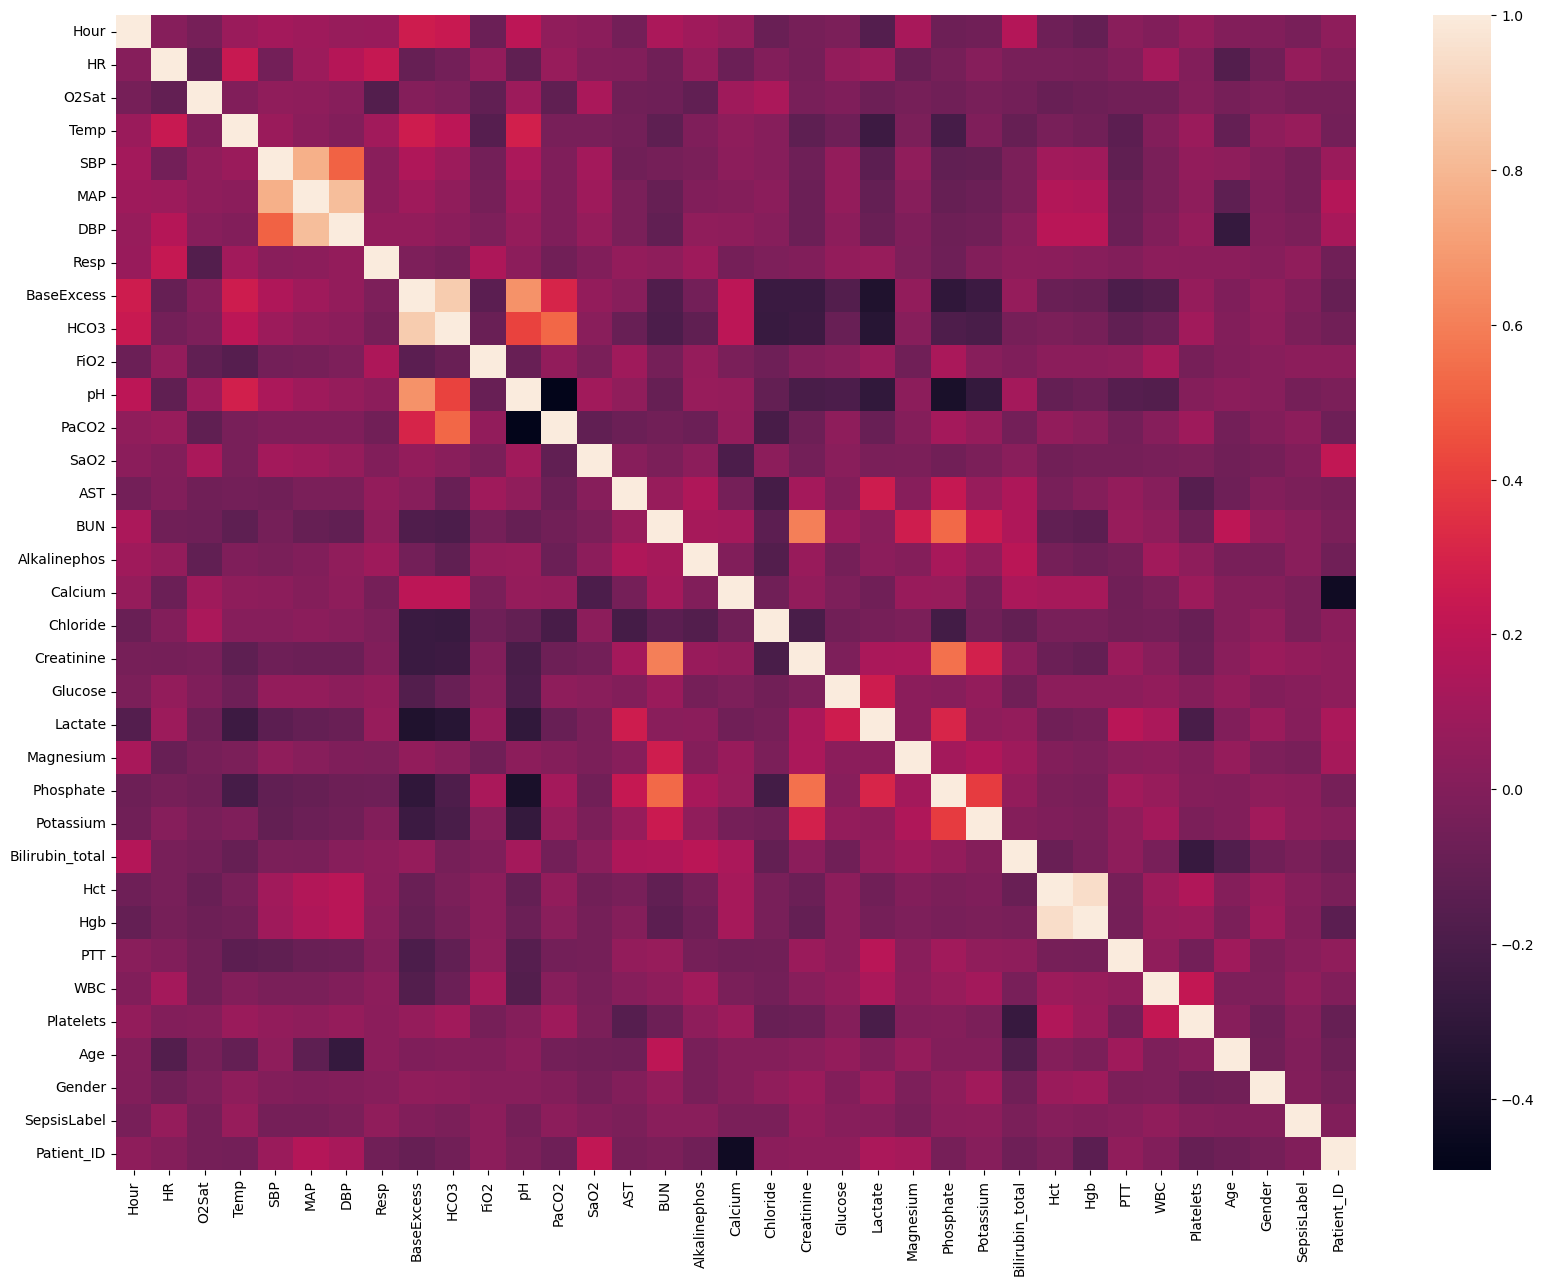

In [11]:
corr=df_sep.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr)

In [12]:
def correlation_matrix(df_corr,threshold):
    '''Returns columns with specified threshold correlation'''
    df_lower=df_corr.where(np.tril(np.ones(corr.shape),k=-1).astype(bool))
    df_lower=df_lower[(df_lower>threshold) | (df_lower<-threshold)]
    df_lower.dropna(how='all',axis=1,inplace=True)
    df_lower.dropna(how='all',axis=0,inplace=True)
    return df_lower

In [13]:
correlation_matrix(corr,0.9)

,Hct
Hgb,0.943847


In [14]:
#Removing one of the highy correlated Columns based on missing percentage.
df_sep[['Hct','Hgb']].isnull().mean()

Hct    0.901525
Hgb    0.916612
dtype: float64

In [15]:
df_sep=df_sep.drop(columns=['Hgb'])

In [16]:
df_sep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172410 entries, 235 to 1551375
Data columns (total 34 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Hour             172410 non-null  int64  
 1   HR               160238 non-null  float64
 2   O2Sat            156621 non-null  float64
 3   Temp             60914 non-null   float64
 4   SBP              148574 non-null  float64
 5   MAP              157567 non-null  float64
 6   DBP              128858 non-null  float64
 7   Resp             150149 non-null  float64
 8   BaseExcess       15309 non-null   float64
 9   HCO3             9926 non-null    float64
 10  FiO2             28859 non-null   float64
 11  pH               19200 non-null   float64
 12  PaCO2            15831 non-null   float64
 13  SaO2             8448 non-null    float64
 14  AST              3970 non-null    float64
 15  BUN              13992 non-null   float64
 16  Alkalinephos     3966 non-null    f

In [17]:
df_sep.to_csv('Sepsis_Raw_data.csv',index=False)

<h3>Outlier Analysis

1. Inter Quartile range
2. Z - score for Columns with Normal Distribution

In [18]:
def determine_outlier_thresholds_iqr(dataframe, col_name,k=1.5, th1=0.25, th3=0.75):
    quartile1 = dataframe[col_name].quantile(th1)
    quartile3 = dataframe[col_name].quantile(th3)
    iqr = quartile3 - quartile1
    upper_limit = quartile3 + k * iqr
    lower_limit = quartile1 - k * iqr
    return lower_limit, upper_limit

def check_outliers_iqr(dataframe, col_name,k,th1=0.25, th3=0.75):
    lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name,k,th1, th3)
    if dataframe[(dataframe[col_name] > int(upper_limit)) | (dataframe[col_name] < int(lower_limit))].any(axis=None):
        return True
    else: 
        return False

def replace_with_thresholds_iqr(dataframe,cols, k,th1=0.25, th3=0.75, replace=False):
    from tabulate import tabulate
    data = []
    for col_name in cols:        
        outliers_ = check_outliers_iqr(dataframe,col_name,k,th1, th3)        
        lower_limit, upper_limit = determine_outlier_thresholds_iqr(dataframe, col_name,k,th1, th3)
        
        if outliers_:            
            Lower = dataframe[(dataframe[col_name] < int(lower_limit))].shape[0]
            Upper = dataframe[(dataframe[col_name] > int(upper_limit)) ].shape[0]
            sepsis_lower= dataframe[((dataframe[col_name] < int(lower_limit))&(dataframe['SepsisLabel']==1))].shape[0]
            sepsis_upper= dataframe[((dataframe[col_name] > int(upper_limit))&(dataframe['SepsisLabel']==1))].shape[0]
            
            data.append([col_name,(Lower if outliers_ else 0),(sepsis_lower if outliers_ else 0),
                             (Upper if outliers_ else 0),(sepsis_upper if outliers_ else 0),
                              int(lower_limit), int(upper_limit)])
                                  
            if replace: 
                dataframe.loc[(dataframe[col_name] < int(lower_limit)), col_name] = np.nan
                dataframe.loc[(dataframe[col_name] > int(upper_limit)), col_name] = np.nan
                    
    data.append(['--------------------','--------','--------------','-------',
                '--------------','-------------','-------------'])
    Lower_t=sum([i[1] for i in data[:-1]])
    Sepsis_lower_t=sum([i[2] for i in data[:-1]])
    Upper_t=sum([i[3] for i in data[:-1]])
    Sepsis_upper_t=sum([i[4] for i in data[:-1]])
    
    data.append(['Subtotal', Lower_t, Sepsis_lower_t, Upper_t, Sepsis_upper_t])
    data.append(['--------------------','--------','--------------','-------',
                '--------------','-------------','-------------'])
    data.append(['Total',Lower_t+Upper_t])
    data.append(['Sepsis Total',Sepsis_lower_t+Sepsis_upper_t])
    if (Lower_t>0) & (Upper_t>0.25):
        data.append(['Sepsis Lower Percent: ',Sepsis_lower_t/Lower_t])
        data.append(['Sepsis Upper Percent: ',Sepsis_upper_t/Upper_t])
    table = tabulate(data, headers=['Column','Lower','Sepsis lower','Upper','Sepsis Upper', 'Lower Limit',
            'Upper Limit'], tablefmt='simple', numalign='right')
    #print("Removing Outliers using IQR")
    print(table)
    

In [19]:
def determine_outlier_thresholds_std(dataframe, col_name,k=3):
    upper_boundary = dataframe[col_name].mean() + k * dataframe[col_name].std()
    lower_boundary = dataframe[col_name].mean() - k * dataframe[col_name].std()
    return lower_boundary, upper_boundary

def check_outliers_std(dataframe, col_name,k):
    lower_boundary, upper_boundary = determine_outlier_thresholds_std(dataframe, col_name,k)
    if dataframe[(dataframe[col_name] > upper_boundary) | (dataframe[col_name] < lower_boundary)].any(axis=None):
        return True
    else: 
        return False

def replace_with_thresholds_std(dataframe, cols, k,replace=False):
    from tabulate import tabulate
    data = []
    for col_name in cols:
        outliers_ = check_outliers_std(dataframe, col_name,k)
        count = None
        lower_limit, upper_limit = determine_outlier_thresholds_std(dataframe, col_name,k)
        if outliers_:
            total_nonull=df_sep[~df_sep[col_name].isnull()].shape[0]
            Lower = len(dataframe[(dataframe[col_name] < int(lower_limit))]['Patient_ID'].unique())#/total_nonull
            Upper = len(dataframe[(dataframe[col_name] > int(upper_limit)) ]['Patient_ID'].unique())#/total_nonull
            sepsis_lower= len(dataframe.loc[((dataframe[col_name] < int(lower_limit))&(dataframe['SepsisLabel']==1)),'Patient_ID']
                                  .unique())
            sepsis_upper= len(dataframe.loc[((dataframe[col_name] > int(upper_limit))&(dataframe['SepsisLabel']==1)),'Patient_ID']
                                  .unique())
            if replace:
                    dataframe.loc[(dataframe[col_name] < int(lower_limit)), col_name] = lower_limit
                    dataframe.loc[(dataframe[col_name] > int(upper_limit)), col_name] = upper_limit
        outliers_status = check_outliers_std(dataframe, col_name,k)
        if outliers_status:
            data.append([#outliers_, 
                         col_name,(Lower if outliers_status else 0),(sepsis_lower if outliers_status else 0),
                            (Upper if outliers_status else 0),(sepsis_upper if outliers_status else 0),
                            int(lower_limit), int(upper_limit)])
    data.append(['---------------','---------------','---------------','--------------','--------------',
                 '--------------','--------------------','-----------------'])  
    Lower_t=sum([i[1] for i in data[:-1]])
    Sepsis_lower_t=sum([i[2] for i in data[:-1]])
    Upper_t=sum([i[3] for i in data[:-1]])
    Sepsis_upper_t=sum([i[4] for i in data[:-1]])
    
    data.append(['Subtotal', Lower_t, Sepsis_lower_t, Upper_t, Sepsis_upper_t])
    data.append(['--------------------','--------','--------------','-------',
                '--------------','-------------','-------------'])
    data.append(['Total',Lower_t+Upper_t])
    data.append(['Sepsis Total',Sepsis_lower_t+Sepsis_upper_t])
    if (Lower_t>0) & (Upper_t>0):
        data.append(['Sepsis Lower Percent: ',Sepsis_lower_t/Lower_t])
        data.append(['Sepsis Upper Percent: ',Sepsis_upper_t/Upper_t])
    table = tabulate(data, headers=[#'Outlier (Previously)',
            'Column','Lower','Sepsis lower','Upper','Sepsis_Upper', 'Lower Limit',
            'Upper Limit'], tablefmt='simple', numalign='right')
    print("Finding Outliers using Standard Deviation")
    print(table)

In [20]:
replace_with_thresholds_iqr(df_sep,df_sep.columns[1:-3],k=3,th1=0.25, th3=0.75,replace=False)

Column                 Lower                Sepsis lower    Upper    Sepsis Upper    Lower Limit    Upper Limit
---------------------  -------------------  --------------  -------  --------------  -------------  -------------
HR                     0                    0               71       14              0              175
O2Sat                  536                  144             0        0               84             112
Temp                   89                   25              6        0               33             41
SBP                    0                    0               37       7               4              242
MAP                    0                    0               196      36              6              155
DBP                    0                    0               178      24              -1             125
Resp                   0                    0               211      35              -5             44
BaseExcess             6                    0   

In [21]:
replace_with_thresholds_std(df_sep,df_sep.columns[1:-3],k=3,replace=False)

Finding Outliers using Standard Deviation
Column                 Lower                Sepsis lower     Upper           Sepsis_Upper    Lower Limit     Upper Limit
---------------------  -------------------  ---------------  --------------  --------------  --------------  --------------------
HR                     3                    0                173             71              32              143
O2Sat                  524                  196              0               0               88              106
Temp                   69                   24               288             164             34              39
SBP                    17                   3                208             73              51              197
MAP                    44                   9                399             123             33              130
DBP                    0                    0                341             102             21              103
Resp                   31     

Outliers are Important for the models to differentiate between Sepsis and Non Sepsis.
Hence we would not remove outliers accounting to the huge numbers and importance.

<h3>Erroneous/noise data Analysis

O2Sat,SaO2, Hct are percentages. Converting from 0-100 range to 0-1 range

In [22]:
df_sep[['O2Sat','SaO2','Hct']]=df_sep[['O2Sat','SaO2','Hct']]/100

O2Sat,SaO2, Hct, FiO2 are percentages and should be between 0 and 1

In [23]:
cols_percent=['O2Sat','FiO2','SaO2','Hct']
for i in cols_percent:
    df_sep.loc[(df_sep[i]<0)|(df_sep[i]>1),i]=np.nan

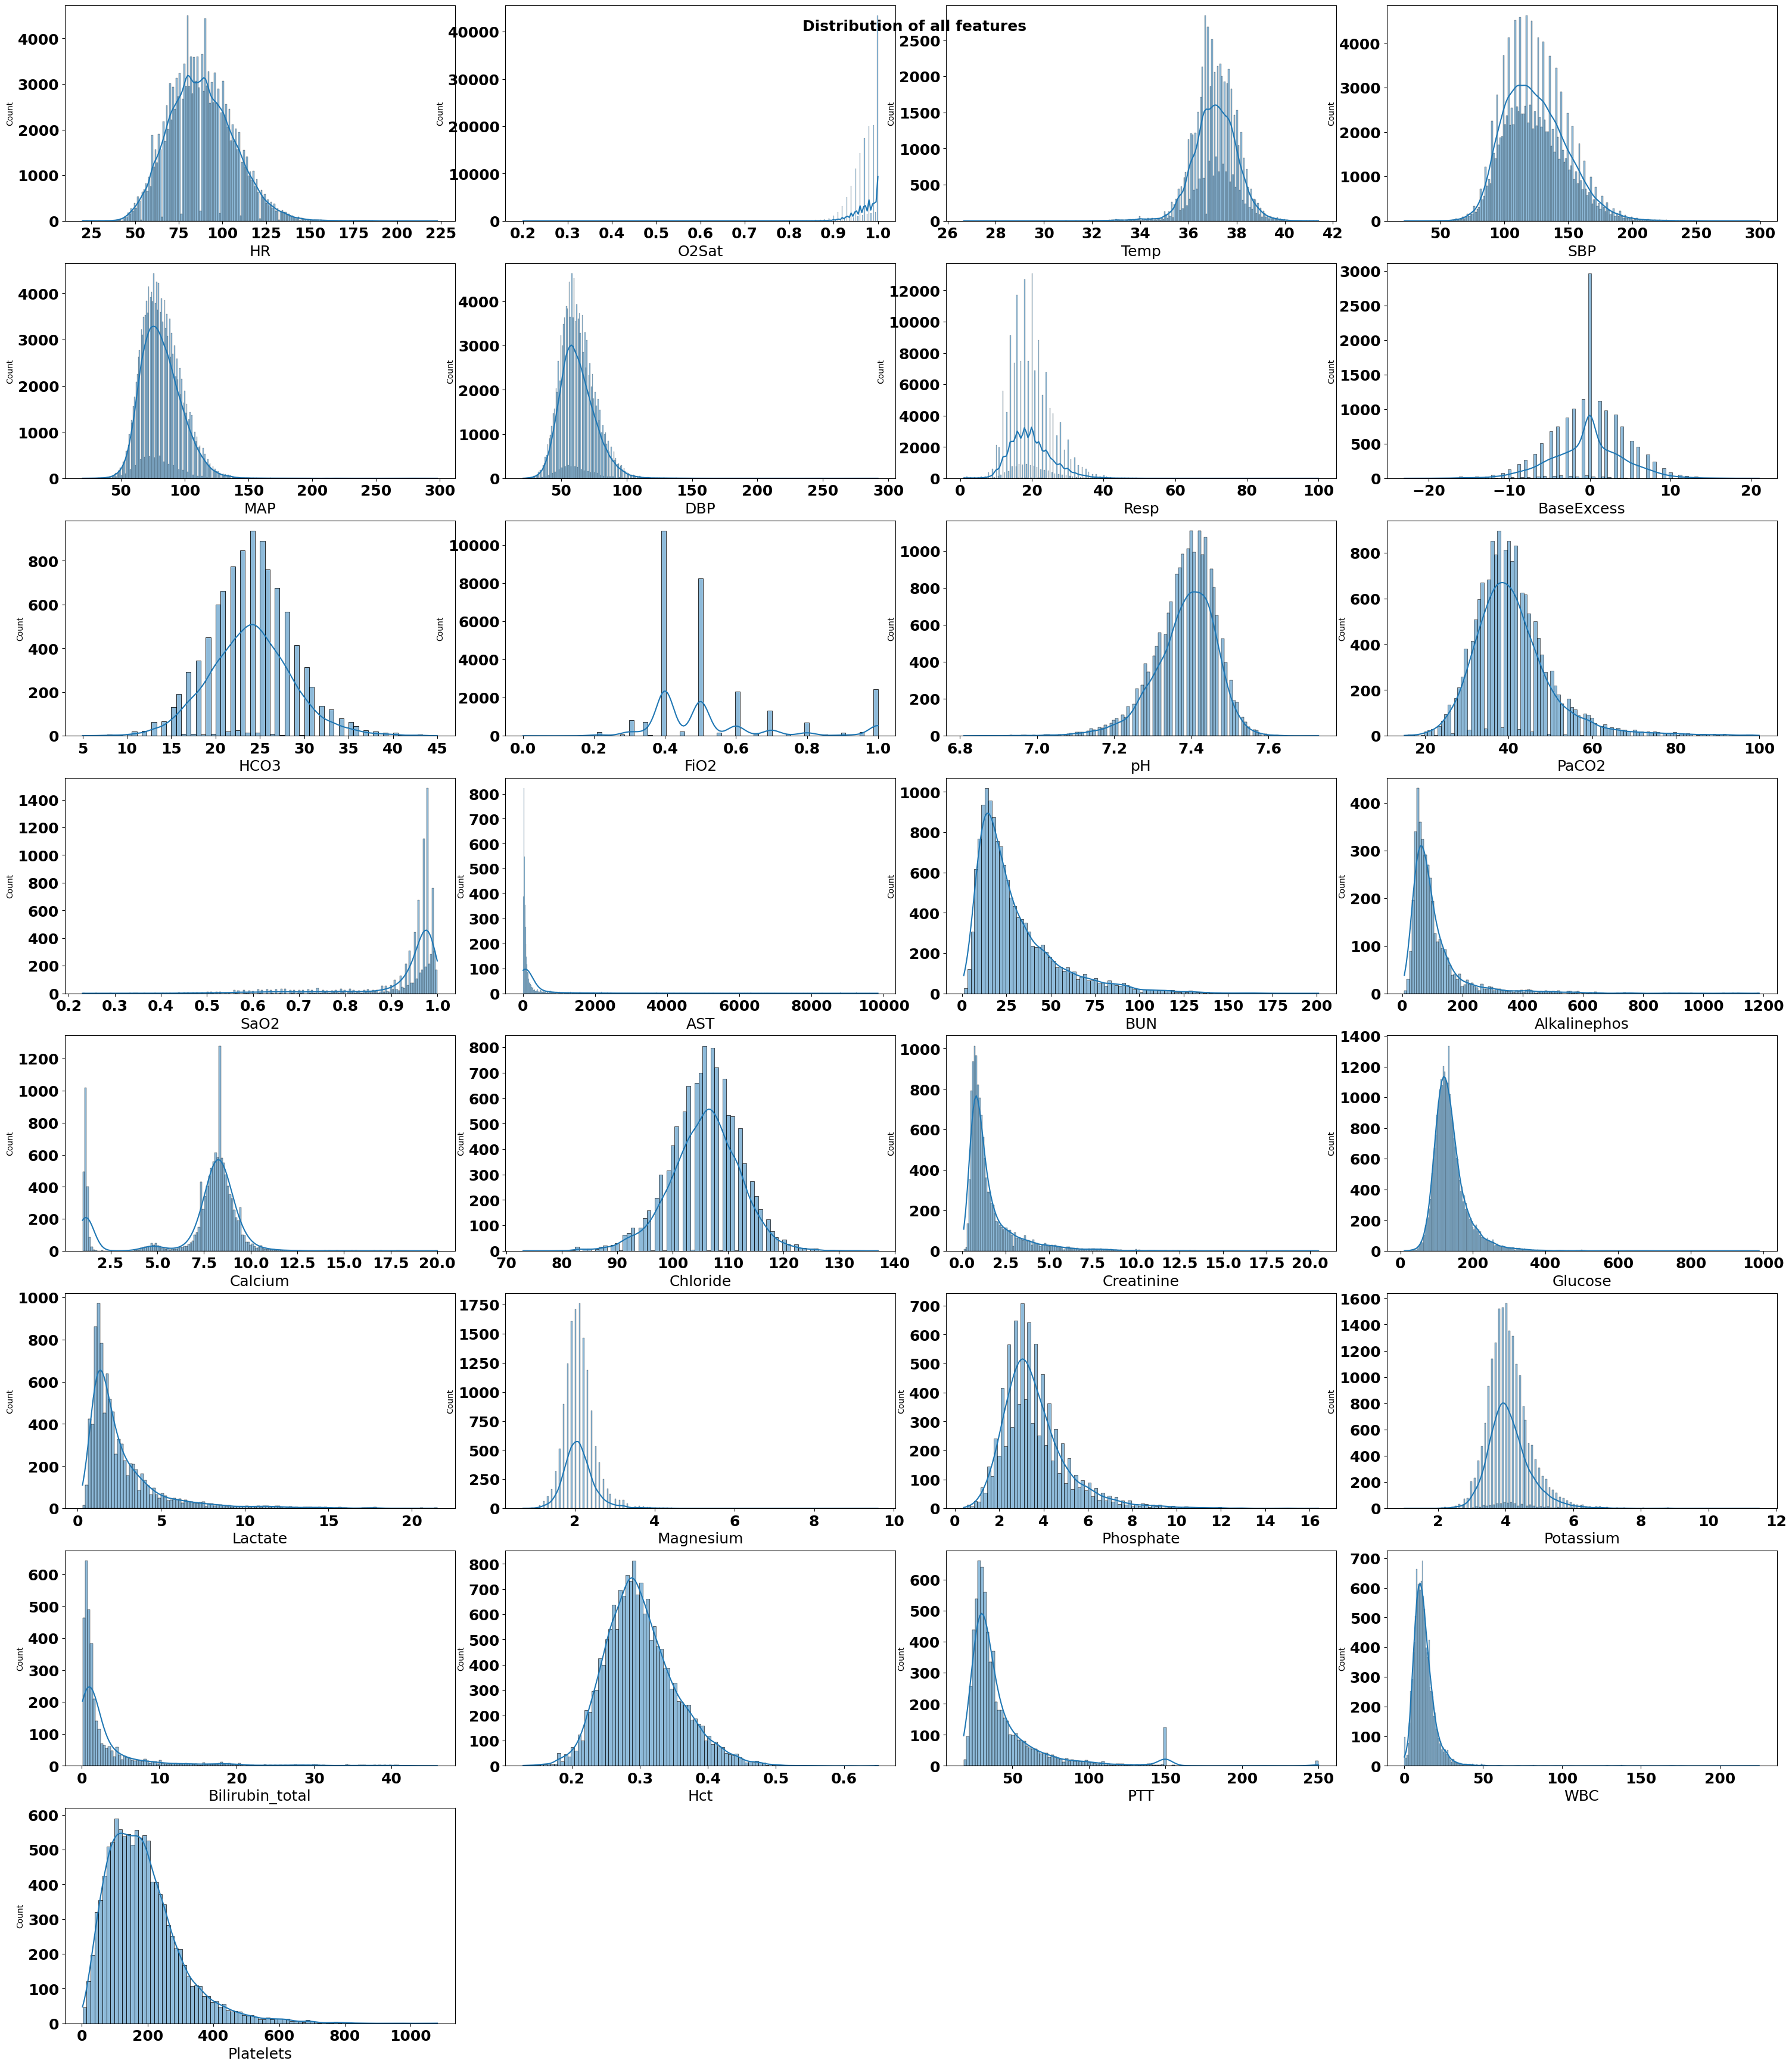

In [28]:
columnnames=df_sep.columns[1:-4].tolist()
rows,cols=8,4
fig, axes = plt.subplots(rows,cols, figsize=(30, 35))
plt.tight_layout(pad=3.0)

i=0
for row in range(rows):
    for col in range(cols):
        plt.subplot(rows,cols,i+1)
        sns.histplot(x=df_sep[columnnames[i]],kde=True)
        plt.suptitle('Distribution of all features',weight = 'bold', fontsize=18)
        plt.xticks(weight = 'bold', fontsize=18)
        plt.yticks(weight = 'bold', fontsize=18)
        plt.xlabel(columnnames[i], fontsize=18)        
        if i==(len(columnnames)-1):
            break
        else:
            i=i+1
N = len(columnnames)            
for ax in axes.flat[N:]:
    ax.remove()       

In [29]:
pd.set_option('display.max_columns', None)
min_max=df_sep.iloc[:,1:-3].describe().T[['min','max']].T
min_max

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,Hct,PTT,WBC,Platelets,Age
min,20.0,0.2,26.67,22.0,20.0,21.0,1.0,-23.0,5.0,0.0,6.81,15.0,0.23,4.0,1.0,7.0,1.0,73.0,0.10,11.0,0.30,0.7,0.4,1.0,0.1,0.128,18.3,0.1,2.0,17.0
max,223.0,1.0,41.40,299.0,298.0,292.0,100.0,21.0,45.0,1.0,7.73,100.0,1.00,9840.0,201.0,1185.0,20.0,137.0,20.49,988.0,21.52,9.6,16.4,11.5,45.9,0.650,250.0,224.9,1081.0,100.0


<h3>Missing Value Imputation using MICE

In [30]:
df_sep.isnull().sum().sum()

3747460

In [31]:
grouped_by_patient = df_sep.groupby('Patient_ID')
df_sep = grouped_by_patient.apply(lambda x: x.bfill().ffill())

In [32]:
df_sep.isnull().sum().sum()

645620

In [35]:
from fancyimpute import IterativeImputer
MICE_imp=IterativeImputer()

In [39]:
df_MICE=df_sep.iloc[:,1:-1].copy(deep=True)
df_MICE.iloc[:,:]=MICE_imp.fit_transform(df_MICE)

In [40]:
df_MICE.isnull().sum().sum()

0

In [41]:
df_MICE.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,Hct,PTT,WBC,Platelets,Age,Gender,SepsisLabel
235,77.0,1.000,36.886808,97.0,26.5,68.0,21.00,-3.0,22.0,1.0,7.29,48.0,0.96,92.0,33.0,60.0,8.3,107.0,0.9,158.0,1.7,2.0,3.7,4.8,0.9,0.422,27.2,17.7,158.0,59.28,1.0,0.0
236,71.5,0.975,36.542059,97.0,83.5,68.0,16.50,-3.0,22.0,1.0,7.29,48.0,0.96,92.0,33.0,60.0,8.3,107.0,0.9,158.0,1.7,2.0,3.7,4.8,0.9,0.422,27.2,17.7,158.0,59.28,1.0,0.0
237,79.0,1.000,36.653835,106.0,87.0,72.0,20.75,-3.0,22.0,1.0,7.29,48.0,0.96,92.0,33.0,60.0,8.0,107.0,0.7,200.0,1.7,2.0,3.6,4.8,0.9,0.422,27.2,17.7,138.0,59.28,1.0,0.0
238,61.0,1.000,36.730339,151.0,95.0,90.0,16.00,-3.0,23.0,0.6,7.29,25.0,0.96,92.0,29.0,60.0,8.0,105.0,0.7,200.0,1.7,1.9,3.6,3.4,0.9,0.396,27.2,13.0,138.0,59.28,1.0,0.0
239,49.0,1.000,36.736256,145.0,92.0,84.0,20.00,-1.0,23.0,0.6,7.49,25.0,0.96,92.0,29.0,60.0,8.0,105.0,0.7,200.0,1.8,1.9,3.6,3.4,0.9,0.396,27.2,13.0,138.0,59.28,1.0,0.0


In [42]:
df_MICE.to_csv('Sepsis_Imputed.csv',index=False)